In [3]:
from requests import Session
from requests_cache import CacheMixin, SQLiteCache
from requests_ratelimiter import LimiterMixin, MemoryQueueBucket
from pyrate_limiter import Duration, RequestRate, Limiter
class CachedLimiterSession(CacheMixin, LimiterMixin, Session):
    pass

session = CachedLimiterSession(
    limiter=Limiter(RequestRate(2, Duration.SECOND*5)),  # max 2 requests per 5 seconds
    bucket_class=MemoryQueueBucket,
    backend=SQLiteCache("yfinance.cache"),
)

In [2]:
from pandas_datareader import data as pdr

import yfinance as yf

In [6]:
ticker = yf.Ticker("aapl", session=session)
ticker_history = ticker.history(period="1h", interval="1m").reset_index()
ticker_history.columns = ticker_history.columns.str.lower()
ticker_history

,datetime,open,high,low,close,volume,dividends,stock splits
0,2024-03-15 15:00:00-04:00,171.525604,171.528900,171.490005,171.494995,0,0.0,0.0
1,2024-03-15 15:01:00-04:00,171.490005,171.529907,171.470001,171.492493,93887,0.0,0.0
2,2024-03-15 15:02:00-04:00,171.500000,171.580002,171.494995,171.565002,67607,0.0,0.0
3,2024-03-15 15:03:00-04:00,171.559998,171.585007,171.500000,171.509995,46039,0.0,0.0
4,2024-03-15 15:04:00-04:00,171.514999,171.559998,171.500000,171.538696,42396,0.0,0.0
5,2024-03-15 15:05:00-04:00,171.529999,171.550003,171.500000,171.505005,57645,0.0,0.0
6,2024-03-15 15:06:00-04:00,171.509903,171.529999,171.500000,171.500000,55308,0.0,0.0
7,2024-03-15 15:07:00-04:00,171.505005,171.535004,171.500000,171.524994,53275,0.0,0.0
8,2024-03-15 15:08:00-04:00,171.529999,171.550003,171.514999,171.535004,47062,0.0,0.0
9,2024-03-15 15:09:00-04:00,171.535004,171.535004,171.490005,171.505005,72540,0.0,0.0


In [19]:
from enum import Enum
import numpy as np
import typing
from datetime import datetime
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

class TradeType(Enum):
    """Represents the type of trade (BUY or SELL)."""

    BUY = -1
    SELL = 1

    @classmethod
    def _missing_(cls, value):
        """Handles case-insensitive lookup of trade types by string."""
        if isinstance(value, str):
            return cls[value.upper()]
        return super()._missing_(value)

class Trade:
    """Represents a single stock trade."""

    def __init__(self, shares, price, timestamp, trade_type, expiration=-1):
        """Initializes a Trade object.

        Args:
            shares (int): Number of shares traded.
            price (float): Price per share.
            timestamp (datetime): Timestamp of the trade.
            trade_type (TradeType): Type of trade (BUY or SELL).
        """

        self.shares = shares
        self.price = price
        self.timestamp = timestamp
        self.trade_type = trade_type
        self.expiration = expiration

    @classmethod
    def buy(self, shares, price, timestamp, expiration=-1):
        """Creates a BUY trade.

        Args:
            shares (int): Number of shares to buy.
            price (float): Price per share.
            timestamp (datetime): Timestamp of the trade.

        Returns:
            Trade: A Trade object representing the BUY transaction.
        """

        return Trade(shares, price, timestamp, TradeType("BUY"), expiration)

    @classmethod
    def sell(self, shares, price, timestamp, expiration=-1):
        """Creates a SELL trade.

        Args:
            shares (int): Number of shares to sell.
            price (float): Price per share.
            timestamp (datetime): Timestamp of the trade.

        Returns:
            Trade: A Trade object representing the SELL transaction.
        """

        return Trade(shares, price, timestamp, TradeType("SELL"), expiration)

class TradeBot:
    """Simulates a simple trading bot."""

    def __init__(self, debug=False):
        """Initializes the TradeBot."""
        self.cash = 0
        self.shares = 0
        self.pending_trades = []
        self.completed_trades = []
        self.reset_history()
        self.debug = debug

    def reset_history(self):
        self.history = {
            "timestamp": list(),
            "cash": list(),
            "shares": list(),
            "net_worth": list(),
        }

    def log(self, timestamp, price):
        self.history["timestamp"].append(timestamp)
        self.history["cash"].append(self.cash)
        self.history["shares"].append(self.shares * price)
        self.history["net_worth"].append(self.cash + (self.shares * price))

    def deposit(self, cash):
        """Deposits cash into the TradeBot's account.

        Args:
            cash (float): Amount of cash to deposit.
        """
        self.cash += cash

    def trade(self, trade):
        """Executes a trade.

        Args:
            trade (Trade): The Trade object to execute.
        """
        if trade.trade_type == TradeType("BUY"):
            cash_diff = (trade.shares * trade.price) * trade.trade_type.value
            if self.cash >= cash_diff:
                self.debug and print(f"BUY: {trade.shares} @ {trade.price} = {cash_diff}; CASH: {self.cash} + {cash_diff} = {self.cash + cash_diff}")
                self.cash += cash_diff
            else:
                return # Invalid Trade
        elif trade.trade_type == TradeType("SELL"):
            share_diff = trade.shares * (trade.trade_type.value * -1)
            if self.shares >= share_diff:
                self.debug and print(f"SELL: {trade.shares} @ {trade.price}; SHARES: {self.shares} + {share_diff} = {self.shares + share_diff}")
                self.shares += share_diff
            else:
                return # Invalid Trade
        self.pending_trades.append(trade)

    def expire(self, trade):
        if trade.trade_type == TradeType("BUY"):
            cash_diff = (trade.shares * trade.price) * (trade.trade_type.value * -1)
            self.debug and print(f"[EXPIRED] BUY: {trade.shares} @ {trade.price} = {cash_diff}; CASH: {self.cash} + {cash_diff} = {self.cash + cash_diff}")
            self.cash += cash_diff
        elif trade.trade_type == TradeType("SELL"):
            share_diff = trade.shares * trade.trade_type.value
            self.debug and print(f"[EXPIRED] SELL: {trade.shares} @ {trade.price}; SHARES: {self.shares} + {share_diff} = {self.shares + share_diff}")
            self.shares += share_diff

    def settle(self, trade):
        if trade.trade_type == TradeType("BUY"):
            share_diff = trade.shares * (trade.trade_type.value * -1)
            self.debug and print(f"[SETTLED] BUY: {trade.shares} @ {trade.price}; SHARES: {self.shares} + {share_diff} = {self.shares + share_diff}")
            self.shares += share_diff
        elif trade.trade_type == TradeType("SELL"):
            cash_diff = (trade.shares * trade.price) * trade.trade_type.value
            self.debug and print(f"[SETTLED] BUY: {trade.shares} @ {trade.price} = {cash_diff}; CASH: {self.cash} + {cash_diff} = {self.cash + cash_diff}")
            self.cash += (trade.shares * trade.price) * trade.trade_type.value
        self.completed_trades.append(trade)

    def settle_pending_trades(self, price):
        indices_to_delete = []
        for i, p_trade in enumerate(self.pending_trades):
            if p_trade.price < price:
                self.settle(p_trade)
                indices_to_delete.append(i)
        for i in reversed(indices_to_delete):
            del self.pending_trades[i]

    def expire_pending_trades(self):
        indices_to_delete = []
        for i, p_trade in enumerate(self.pending_trades):
            if p_trade.expiration == 0:
                self.expire(p_trade)
                indices_to_delete.append(i)
            else:
                p_trade.expiration -= 1
        for i in reversed(indices_to_delete):
            del self.pending_trades[i]

    def play(self, strategy, ticker_name, session, **history_kwargs):
        """Executes a trading strategy using historical data.

        Args:
            strategy (Strategy): The trading strategy to use.
            ticker_name (str): Name of the stock ticker.
            session:  A yfinance session object.
            **history_kwargs: Arguments to pass to yfinance for retrieving history.
        """
        ticker = yf.Ticker(ticker_name, session=session)
        ticker_history = ticker.history(**history_kwargs).reset_index()
        ticker_history.columns = ticker_history.columns.str.lower()
        ticker_history.rename(columns={'datetime': 'timestamp', 'stock splits': 'stock_splits'}, inplace=True)
        self.reset_history()
        start_price = ticker_history.head(1).iloc[0]["open"]
        print(f"Starting Net Worth: Cash: {self.cash}, Shares: {self.shares} @ {start_price} = {self.cash + self.shares * start_price}")
        for index, row in ticker_history.iterrows():
            self.expire_pending_trades()
            self.settle_pending_trades(row["open"])
            self.settle_pending_trades(row["close"])
            kwargs = dict(cash=self.cash, shares=self.shares, ticker_name=ticker_name, **history_kwargs, **row)
            trade = strategy.play(**kwargs)
            if trade:
                self.trade(trade)
            self.log(row["timestamp"], row["close"])
        end_price = ticker_history.tail(1).iloc[0]["close"]
        print(f"Ending Net Worth: Cash: {self.cash}, Shares: {self.shares} @ {start_price} = {self.cash + self.shares * end_price}")
        net_worth_change = ((self.cash + self.shares * end_price) - (self.cash + self.shares * start_price)) / (self.cash + self.shares * start_price)
        stock_change = (end_price - start_price) / start_price
        print(f"Your Net Worth changed {net_worth_change * 100: .2f}%.")
        print(f"The Stock Prick changed {stock_change * 100: .2f}%.")

    def plot_history(self, figsize=(48, 6)):
        """
        Plots cash, shares, and net worth over time using Seaborn.

        Args:
            df (pd.DataFrame): Dataframe containing columns 'timestamp', 'cash', 'shares', and 'net_worth'.
            figsize (tuple, optional): Desired figure size. Defaults to (12, 6).
        """
        df = pd.DataFrame(self.history)
        # Ensure the DataFrame has the required columns
        required_cols = ['timestamp', 'cash', 'shares', 'net_worth']
        if not all(col in df.columns for col in required_cols):
            raise ValueError("DataFrame must contain columns: {}".format(required_cols))

        # Prepare for long-format plotting with Seaborn
        df = df.reset_index()  # Reset timestamp to a normal column
        df_long = pd.melt(df, id_vars='timestamp', value_vars=['cash', 'shares', 'net_worth'], var_name='Metric', value_name='Value')

        # Create the Seaborn plot
        sns.relplot(
            data=df_long,
            x='timestamp',
            y='Value',
            hue='Metric',
            kind='line',
            height=figsize[1],
            aspect=figsize[0]/figsize[1]
        )

        # Formatting: Control x-axis ticks
        plt.xticks(rotation=90)  # Keep the rotation
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatic, spaced ticks
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) # Full timestamp format
        plt.legend(title='')
        plt.show()


In [20]:
class Strategy:
    """Base class for trading strategies."""

    def play(
        self,
        *,
        cash: float,
        shares: int,
        timestamp: pd._libs.tslibs.timestamps.Timestamp,
        open: float,
        high: float,
        low: float,
        close: float,
        volume: int,
        dividends: float,
        stock_splits: float,
        **kwargs
    ) -> typing.Optional[Trade]:
        """Implements the trading strategy logic based on historical and current market data.

        This method is the core of your trading strategy. It receives various data points.
        and the current state of the TradeBot to make trading decisions.

        Args:
            ticker_name (str): The name of the stock ticker symbol.
            cash (float): The current cash balance of the TradeBot.
            shares (int): The current number of shares held by the TradeBot for this stock.
            timestamp (pd._libs.tslibs.timestamps.Timestamp): The datetime of the current data point.
            open_ (float): The opening price of the stock on that date.
            high (float): The highest price of the stock on that date.
            low (float): The lowest price of the stock on that date.
            close (float): The closing price of the stock on that date.
            volume (int): The trading volume for that date.
            dividends (float): Any dividends distributed for that date (usually 0).
            stock_split (float): Any stock split factor for that date (usually 1).
            **kwargs (dict): Optional keyword arguments that may be passed by the TradeBot.play method.

        Returns:
            typing.Optional[Trade]:
                - Returns a `Trade` object if the strategy decides to execute a trade (BUY or SELL).
                - Returns `None` if the strategy chooses not to trade at this point.

        **Note:** Subclasses implementing specific trading strategies must define their own logic
        within this method to analyze the provided data and make trading decisions.
        """

        raise NotImplementedError("Subclass must implement the play method")

In [21]:
class Sheep(Strategy):
    def play(
        self,
        *,
        cash: float,
        shares: int,
        timestamp: pd._libs.tslibs.timestamps.Timestamp,
        open: float,
        high: float,
        low: float,
        close: float,
        volume: int,
        dividends: float,
        stock_splits: float,
        **kwargs
    ) -> typing.Optional[Trade]:
        """Implements the trading strategy logic based on historical and current market data.

        This method is the core of your trading strategy. It receives various data points.
        and the current state of the TradeBot to make trading decisions.

        Args:
            ticker_name (str): The name of the stock ticker symbol.
            cash (float): The current cash balance of the TradeBot.
            shares (int): The current number of shares held by the TradeBot for this stock.
            timestamp (pd._libs.tslibs.timestamps.Timestamp): The datetime of the current data point.
            open_ (float): The opening price of the stock on that date.
            high (float): The highest price of the stock on that date.
            low (float): The lowest price of the stock on that date.
            close (float): The closing price of the stock on that date.
            volume (int): The trading volume for that date.
            dividends (float): Any dividends distributed for that date (usually 0).
            stock_split (float): Any stock split factor for that date (usually 1).
            **kwargs (dict): Optional keyword arguments that may be passed by the TradeBot.play method.

        Returns:
            typing.Optional[Trade]:
                - Returns a `Trade` object if the strategy decides to execute a trade (BUY or SELL).
                - Returns `None` if the strategy chooses not to trade at this point.

        **Note:** Subclasses implementing specific trading strategies must define their own logic
        within this method to analyze the provided data and make trading decisions.
        """
        if open < close:
            # Stock is rising; BUY
            shares = (cash // 2) // close
            # Use half my cash to buy shares at closing price; trade expires after 5 iterations
            return Trade.buy(shares, close, datetime, 5)
        elif open > close:
            # Stock is dropping; SELL
            shares = int(np.ceil(shares / 2))
            # Sell half shares at closing price; trade expires after 5 iterations
            return Trade.sell(shares, close, datetime, 5)
        else:
            # Don't make a Trade
            return None

In [22]:
bot = TradeBot()

In [23]:
bot.deposit(1000)

In [24]:
strat = Sheep()

In [25]:
bot.play(strat, "aapl", period="7d", interval="1m", session=session)

Starting Net Worth: Cash: 1000, Shares: 0 @ 169.14999389648438 = 1000.0
Ending Net Worth: Cash: 317.6357421875, Shares: 4.0 @ 169.14999389648438 = 1007.915771484375
Your Net Worth changed  1.38%.
The Stock Prick changed  2.02%.


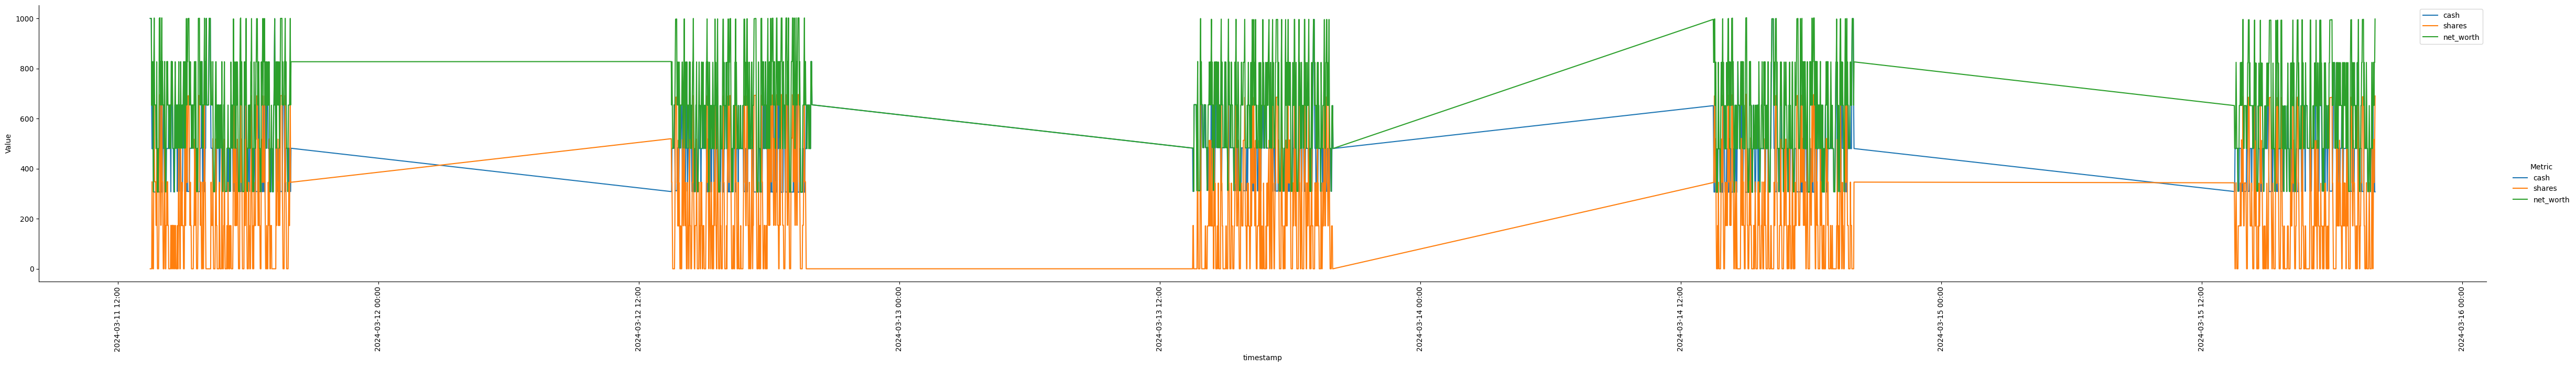

In [17]:
bot.plot_history()